In [184]:
from zipfile import ZipFile
import pandas as pd
import kaggle
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [209]:
# https://www.kaggle.com/kimjihoo/coronavirusdataset
kaggle.api.authenticate()
kg_url='kimjihoo/coronavirusdataset'
files=['patient.csv','route.csv','time.csv']

In [210]:
for file in files:
    kaggle.api.dataset_download_file(kg_url,file,force=True, path='data')#force =Trure rewrites file if excist


In [218]:
df_patient = pd.read_csv('data/'+files[0])
df_route = pd.read_csv('data/'+files[1])
df_time = pd.read_csv('data/'+files[2])
#df_time =df_time.reset_index()

In [219]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               51 non-null     object
 1   time               51 non-null     int64 
 2   test               51 non-null     int64 
 3   negative           51 non-null     int64 
 4   confirmed          51 non-null     int64 
 5   released           51 non-null     int64 
 6   deceased           51 non-null     int64 
 7   Seoul              51 non-null     int64 
 8   Busan              51 non-null     int64 
 9   Daegu              51 non-null     int64 
 10  Incheon            51 non-null     int64 
 11  Gwangju            51 non-null     int64 
 12  Daejeon            51 non-null     int64 
 13  Ulsan              51 non-null     int64 
 14  Sejong             51 non-null     int64 
 15  Gyeonggi-do        51 non-null     int64 
 16  Gangwon-do         51 non-null     int64 
 17 

In [220]:
#df_time.rename(columns={'176':'Date'},inplace=True)
df_time['date']=pd.to_datetime(df_time['date'])

In [221]:
df_patient['id'].nunique(), df_patient.shape

(7513, (7513, 15))

In [222]:
df_route['id'].nunique(), df_route.shape

(55, (212, 7))

In [223]:
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7513 entries, 0 to 7512
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7513 non-null   int64  
 1   sex               662 non-null    object 
 2   birth_year        649 non-null    float64
 3   country           7513 non-null   object 
 4   region            421 non-null    object 
 5   disease           28 non-null     float64
 6   group             82 non-null     object 
 7   infection_reason  144 non-null    object 
 8   infection_order   35 non-null     float64
 9   infected_by       70 non-null     float64
 10  contact_number    50 non-null     float64
 11  confirmed_date    7513 non-null   object 
 12  released_date     55 non-null     object 
 13  deceased_date     36 non-null     object 
 14  state             7513 non-null   object 
dtypes: float64(5), int64(1), object(9)
memory usage: 880.6+ KB


In [224]:
date_clm = ['confirmed_date','released_date','deceased_date']
for clm in date_clm:
    df_patient[clm]=pd.to_datetime(df_patient[clm])

In [225]:
df_patient['duration']=df_patient['released_date']-df_patient['confirmed_date']
df_patient['duration_death']=df_patient['deceased_date']-df_patient['confirmed_date']
df_patient['age'] =2019- df_patient['birth_year']

Text(0.5, 0, 'age')

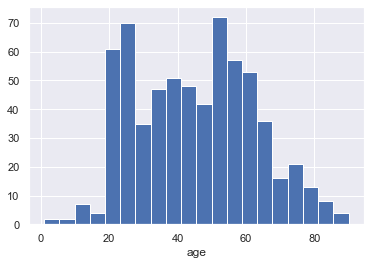

In [226]:
df_patient['age'].hist(bins=20)
plt.xlabel('age')

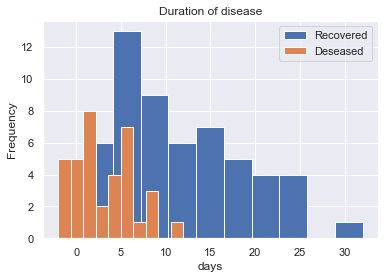

In [227]:
df_patient['duration'].astype('timedelta64[D]').plot.hist(label='Recovered')
df_patient['duration_death'].astype('timedelta64[D]').plot.hist(label='Deseased')
plt.xlabel('days')
plt.legend()
plt.title('Duration of disease')
plt.show()

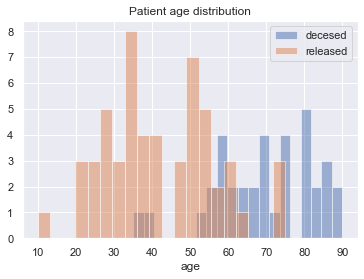

In [228]:
df_patient[df_patient['state']=='deceased']['age'].hist(bins=20,alpha=0.5,label='decesed')
df_patient[df_patient['state']=='released']['age'].hist(bins=20,alpha=0.5,label='released')
plt.xlabel('age')
plt.title('Patient age distribution')
plt.legend();

In [229]:
df_time=df_time.set_index('date')


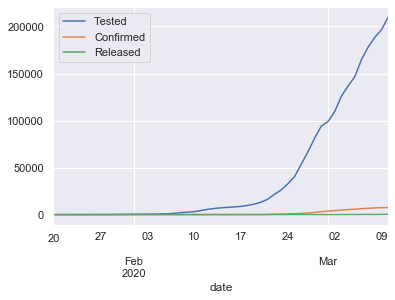

In [232]:
df_time['test'].plot(label='Tested')
df_time['confirmed'].plot(label='Confirmed')
df_time['released'].plot(label='Released')
plt.legend()
